<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/HW2/HW2_Assignment2_BSinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2: Design Investigation of Citibike Data**
---

In [ ]:
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np

%pylab inline

import pandas as pd
import zipfile
import requests
from io import BytesIO

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


###**General Idea**
---

People who self-identify as women (*women* for short) are more likely than people who self-identify as men (*men* for short) to use Citibike for day travel.

**OR** (in terms of proportions due to the unequal usage rate)

The proportion of women who use Citibike for day travel is greater than the proportion of men who use Citibike for day travel.

###**Significance Threshhold**
---

I will use a significance level  $\alpha=0.05$

###**Null Hypothesis**
---

The proportion of men who use Citibike for night travel is less than the proportion of women who use Citibike for night travel.

The proportion of women who use Citibike for night travel is the same or greater than the proportion of men who use Citibike for night travel.

# _$H_0$_ : $\frac{M_{\\{night}}}{M_{\\{total}}} $$ <= $$ \frac{W_{\\{night}}}{W_{\\{total}}}$
##$or$
# _$H_0$_ : $\frac{M_{\\{night}}}{M_{\\{total}}} $ $ - $ $ \frac{W_{\\{night}}}{W_{\\{total}}}$ $<=0$

###**Alternative Hypothesis**
---

The proportion of men who use Citibike for night travel is greater than the proportion of women who use Citibike for night travel.

The proportion of women who use Citibike for night travel is less than the proportion of men who use Citibike for night travel.

# _$H_A$_ : $\frac{M_{\\{night}}}{M_{\\{total}}} $ $ > $ $ \frac{W_{\\{night}}}{W_{\\{total}}}$
##$or$
# _$H_A$_ : $\frac{M_{\\{night}}}{M_{\\{total}}} $ $ - $ $ \frac{W_{\\{night}}}{W_{\\{total}}}$ $>0$

###**Null Hypothesis Rejection Testing**
---

Z test for unpaired data // difference of proportions

##**Data Testing**
---

In [ ]:
datestring = '2019'

# Define the URL of the zip file
url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"

# Download the zip file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

#extract all the files in the zipped folder locally
zip_file.extractall()

In [ ]:
!ls

2019-citibike-tripdata	__MACOSX  sample_data


In [ ]:
!ls 2019-citibike-tripdata

10_October   12_December  2_February  4_April  6_June  8_August
11_November  1_January	  3_March     5_May    7_July  9_September


In [ ]:
!ls 2019-citibike-tripdata/5_May

201905-citibike-tripdata_1.csv	201905-citibike-tripdata_2.csv


In [ ]:
cbMay19 = pd.read_csv(datestring + '-citibike-tripdata/5_May/' + datestring + '05-citibike-tripdata_1.csv')

In [ ]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [ ]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
#add a datetime object
cbMay19["date"] = pd.to_datetime(cbMay19.starttime)

In [ ]:
#clean up
cbMay19.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [ ]:
cbMay19.head()

,gender,date
0,1,2019-05-01 00:00:01.901
1,0,2019-05-01 00:00:03.021
2,1,2019-05-01 00:00:04.627
3,1,2019-05-01 00:00:19.334
4,1,2019-05-01 00:00:22.184


In [2]:
cbMay19_w = cbMay19[cbMay19['gender'] == 2].drop(["gender"], axis=1)
counts_w = cbMay19_w['date'].groupby([cbMay19_w.date.dt.hour]).count()

ax = counts_w.plot(kind="bar",
                                                                        color='IndianRed',
                                                                        label='female')
cbMay19_m = cbMay19[cbMay19['gender'] == 1].drop(["gender"], axis=1)
counts_m = cbMay19_m['date'].groupby([cbMay19_m.date.dt.hour]).count()

ax = counts_m.plot(kind="bar",
                                                                        color='SteelBlue',
                                                                        alpha=0.5,
                                                                        label='male', ax=ax)
ax.set_yticks((0,10000,20000,30000,40000,50000,60000,70000));
ax.set_xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23));
ax.xaxis.set_ticklabels(['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'], fontsize = 8);
ax.yaxis.set_ticklabels(['0','10,000','20,000','30,000','40,000','50,000','60,000','70,000'], fontsize = 8);
plt.legend(["female","male"], fontsize='small');
plt.title("Number of Rides by Gender and Time of Day\nMay 2019");
plt.ylabel("Number of Rides");
plt.xlabel("Time of Day");

NameError: name 'cbMay19' is not defined

#####**Figure 2.1** Distribution of Citibike user data by gender and time of day, absolute counts

In [ ]:
norm_w = len(cbMay19_w)
error_w = cbMay19_w["date"][cbMay19_w.date.dt.hour < 5].groupby(cbMay19_w.date.dt.hour).count().std()
errnight_w = cbMay19_w["date"][cbMay19_w.date.dt.hour >= 5].groupby(cbMay19_w.date.dt.hour).count().std()
norm_w, error_w, errnight_w

(236060, 553.7833511401368, 6712.728602181806)

In [ ]:
norm_m = len(cbMay19_m)
error_m = cbMay19_m["date"][cbMay19_m.date.dt.hour < 5].groupby(cbMay19_m.date.dt.hour).count().std()
errnight_m = cbMay19_m["date"][cbMay19_m.date.dt.hour >= 5].groupby(cbMay19_m.date.dt.hour).count().std()
norm_m, error_m, errnight_m

(695072, 2184.730074860508, 18813.190878611946)

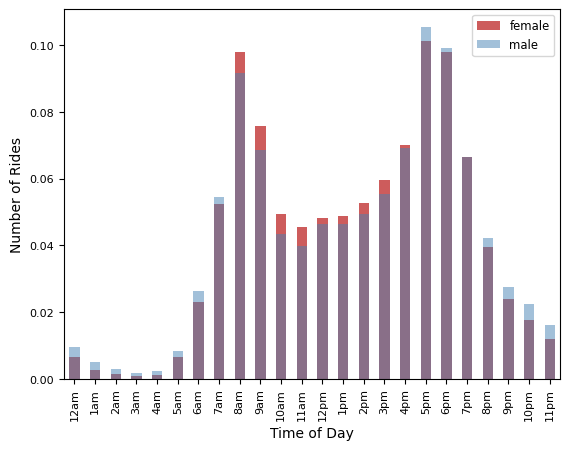

In [ ]:
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed', label='women bikers')
(counts_m / norm_m).plot(kind="bar", alpha=0.5,
                           color='SteelBlue', label='men bikers', ax=ax)
ax.set_yticks((0.00,0.02,0.04,0.06,0.08,0.10));
ax.set_xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23));
ax.xaxis.set_ticklabels(['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'], fontsize = 8);
ax.yaxis.set_ticklabels(['0.00','0.02','0.04','0.06','0.08','0.10'], fontsize = 8);
plt.legend(["female","male"], fontsize='small');
ax.set_ylabel ("Number of Rides");
ax.set_xlabel ("Time of Day");

#####**Figure 2.2** Distribution of Citibike user data by gender and time of day, normalized

###**Set up Test of Proportions**
---

Men: week:0.114, weekend:0.870, weekend error:0.027, weekend error:0.003
Women: week:0.093, weekend:0.895, weekend error:0.028, weekend error:0.002


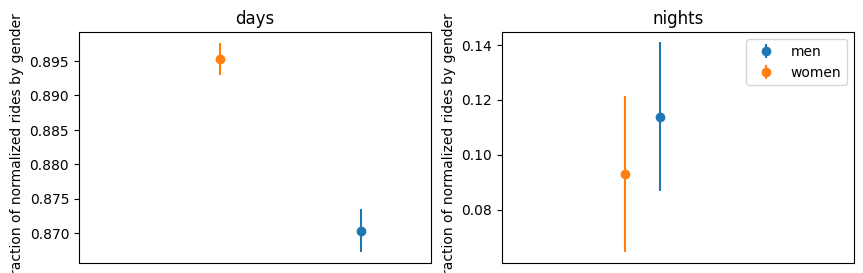

In [ ]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

night_w = (sum(counts_w[0:5])+sum(counts_w[20:23])) * 1.0 / norm_w  #fraction of women riding on week days
day_w = sum(counts_w[5:20]) * 1.0 / norm_w  #fraction of women riding on weekends
eday_w = error_w / norm_w  #error on fraction number of women riding on week days
enight_w = errnight_w / norm_w #error on fraction number of women riding on weekends

#same nomenclature as above
night_m = (sum(counts_m[0:5])+sum(counts_m[20:23])) * 1.0 / norm_m
day_m = sum(counts_m[5:20]) * 1.0 / norm_m
eday_m= error_m / norm_m  #error on fraction number of men riding on week days
enight_m = errnight_m / norm_m #error on fraction number of men riding on weekends

print("Men: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(night_m, day_m, enight_m, eday_m))
print("Women: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(night_w, day_w, enight_w, eday_w))

ax1.errorbar([0.4], [day_m], yerr=[eday_m], fmt='o', label='men');
ax1.errorbar([0.2], [day_w], yerr=[eday_w], fmt='o', label='women');
ax1.set_xlim(0, 0.5);
ax2.errorbar([0.4], [night_m], yerr=[enight_m], fmt='o', label='men');
ax2.errorbar([0.2], [night_w], yerr=[enight_w], fmt='o', label='women');
ax1.set_xlim(0, 0.5);
ax1.set_title("days");
ax2.set_title("nights");
ax2.set_ylabel("Fraction of normalized rides by gender");
ax1.set_ylabel("Fraction of normalized rides by gender");
ax1.set_xticks([]);
ax2.set_xticks([]);
plt.xlim(-0.5, 1.5);
plt.legend();

#####**Figure 2.3** Fraction of Citibike users by gender in May 2019, separated by day and night usage

In [ ]:
P0mP1 = night_m - night_w
print ("The difference between men and women biking at night: {:.2f}".format(P0mP1))
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

The difference between men and women biking at night: 0.02
We must check the significance before we reject the Null Hypothesis


In [ ]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

def ztest_p(p0, p1, n0, n1):
  return (p0 * n0 + p1 * n1) / (n0 + n1)
def ztest_se(p0, p1, n0, n1):
  p = ztest_p(p0, p1, n0, n1)
  return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
def zscore(p0, p1, n0, n1) :
  return (p0 - p1) / ztest_se(p0, p1, n0, n1)

# calculations

z = zscore(night_m, night_w, norm_w, norm_m)
print ("The z statistics is %.2f"%z)

The z statistics is 29.54


In [ ]:
def r_effectsize (z, n0, n1) :
  return z / np.sqrt(n0 + n0)
def h_effectsize (p0, p1):
  return 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [ ]:
r = r_effectsize(z, norm_w, norm_m)
print ('r effect size {:.2f}'.format(r))

r effect size 0.04


In [ ]:
h = h_effectsize(night_m, night_w)
print ("Cohen's h effect size {:.2f}".format(h))

Cohen's h effect size 0.07
